# Burndown chart from JSON (trello)
    By Aleksandrs Krivickis, ak7993g@gre.ac.uk, aleksandrs.krivickis@gmail.com

In [1]:
import os
import json
import pandas
import matplotlib.pyplot as plt
import datetime

In [2]:
pandas.set_option('display.max_rows', 50)
pandas.set_option('display.max_columns', 500)
pandas.set_option('display.width', 1000)

In [3]:
TRELLO_EXPORT_FILE = "./xC7CBjBU.json"

In [4]:
with open(TRELLO_EXPORT_FILE, encoding="utf8") as data_file:
    trello_data = json.load(data_file)

In [5]:
trello_data_cards = pandas.DataFrame(trello_data["cards"])
trello_data_cards.sample(3)

,id,address,checkItemStates,closed,coordinates,creationMethod,dateLastActivity,desc,descData,dueReminder,idBoard,idLabels,idList,idMembersVoted,idShort,idAttachmentCover,limits,locationName,manualCoverAttachment,name,pos,shortLink,isTemplate,badges,dueComplete,due,email,idChecklists,idMembers,labels,shortUrl,subscribed,url,cover,attachments,pluginData,customFieldItems
46,5e3ca6b43a23b75bcd7f4ce3,None,None,False,None,None,2020-03-13T15:25:28.520Z,"""An administrator is needed to maintain any sy...",None,1440.0,5e2ae2d856a6497bedfd250c,[],5e2ae3a365af26065e5ce1a9,[],74,None,"{'attachments': {'perCard': {'status': 'ok', '...",None,False,Web Designer - Administrator panel to maintain...,1.638400e+04,TPtu3n79,False,"{'attachmentsByType': {'trello': {'board': 0, ...",True,2020-03-13T20:53:00.000Z,aleksandrskri+2rjbwojzbjl6a7rujm7+2tsjt5capxt0...,[],[],[],https://trello.com/c/TPtu3n79,False,https://trello.com/c/TPtu3n79/74-web-designer-...,"{'idAttachment': None, 'color': None, 'idUploa...",[],[],[]
103,5e3c7f29386d4c1024b19a76,None,None,False,None,None,2020-03-13T15:25:20.803Z,Populate the database with dummy data,{'emoji': {}},1440.0,5e2ae2d856a6497bedfd250c,[],5e2ae3a365af26065e5ce1a9,[],58,None,"{'attachments': {'perCard': {'status': 'ok', '...",None,False,Engineer - Create database population script,9.502720e+05,Q5sl2Lby,False,"{'attachmentsByType': {'trello': {'board': 0, ...",True,2020-02-07T14:05:00.000Z,aleksandrskri+2rjbwojzbjl6a7rujm7+2tsiyqmy8f8s...,[],"[5e2aeb89f657088e0d6f05df, 5e333f089c998882eb7...",[],https://trello.com/c/Q5sl2Lby,False,https://trello.com/c/Q5sl2Lby/58-engineer-crea...,"{'idAttachment': None, 'color': None, 'idUploa...",[],[],[]
36,5e6ba1eaf324e54082a58a49,None,None,False,None,None,2020-03-17T21:44:27.392Z,,None,NaN,5e2ae2d856a6497bedfd250c,[],5e2ae31c90cda0511b766d7b,[],130,None,"{'attachments': {'perCard': {'status': 'ok', '...",None,False,Engineer - View_ideas.php hide submit comment...,1.372183e+06,N0UrPC5V,False,"{'attachmentsByType': {'trello': {'board': 0, ...",False,None,aleksandrskri+2rjbwojzbjl6a7rujm7+2tzoq1gajhui...,[],"[5e2ed8a27d62996258363848, 5e3885820deb1a067b0...",[],https://trello.com/c/N0UrPC5V,False,https://trello.com/c/N0UrPC5V/130-engineer-vie...,"{'idAttachment': None, 'color': None, 'idUploa...",[],[],[]


In [6]:
len(trello_data_cards)

114

# Exporting user stories

In [7]:
trello_data_cards[["name", "due"]].to_excel("user_stories.xlsx")

# Extracting necessary features

In [8]:
trello_data_cards_reindexed = trello_data_cards[["name", "dateLastActivity", "due", "dueComplete", "closed"]]
trello_data_cards_reindexed["due"] = trello_data_cards_reindexed["due"].apply(lambda x: "2020-03-13T19:45:00.000Z" if x==None else x)

trello_data_cards_reindexed["due"] = pandas.to_datetime(trello_data_cards_reindexed["due"]).dt.date
trello_data_cards_reindexed = trello_data_cards_reindexed.sort_values('due', ascending=False).reset_index().drop("index", axis=1)
trello_data_cards_reindexed = trello_data_cards_reindexed.reindex(index=trello_data_cards_reindexed.index[::-1])

trello_data_cards_reindexed = trello_data_cards_reindexed.reset_index()
trello_data_cards_reindexed.columns = ['cards_remaining', 'name', 'dateLastActivity', 'due', 'dueComplete', 'closed']
trello_data_cards_reindexed[:10]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,cards_remaining,name,dateLastActivity,due,dueComplete,closed
0,113,Scrum Master - Establish agile scrum methods -...,2020-03-13T15:25:20.771Z,2020-01-31,True,False
1,112,Scrum Master - assign roles - 1 - 0.1,2020-03-13T15:25:20.778Z,2020-01-31,True,False
2,111,Scrum Master - System Architecture Design - 5 ...,2020-03-13T15:25:20.777Z,2020-01-31,True,False
3,110,Database Designer - Database Design - 13 - Sam...,2020-03-13T15:25:20.784Z,2020-01-31,True,False
4,109,Web Designer - Implement website design sketch,2020-03-13T15:25:20.807Z,2020-02-03,True,False
5,108,Web Designer - Implement Design for Mobile vie...,2020-03-13T15:25:20.828Z,2020-02-07,True,False
6,107,Scrum Master - Burndown Chart,2020-03-13T15:25:20.815Z,2020-02-07,True,False
7,106,Product Owner - analyse project's example repo...,2020-03-13T15:25:20.815Z,2020-02-07,True,False
8,105,Web Designer - Implement mobile website design...,2020-03-13T15:25:20.815Z,2020-02-07,True,False
9,104,Web Designer - Implement Design For Views - Re...,2020-03-13T15:25:20.842Z,2020-02-07,True,False


In [9]:
trello_data_cards_reindexed["due"] = pandas.to_datetime(trello_data_cards_reindexed["due"]).dt.date

In [10]:
# planned_burndown = trello_data_cards_reindexed.groupby(by="due").first()
# planned_burndown

In [11]:
ideal_burndown = pandas.DataFrame([
    {"due": trello_data_cards_reindexed.due.min(), "cards_remaining": trello_data_cards_reindexed.cards_remaining.max()},
    {"due": trello_data_cards_reindexed.due.max(), "cards_remaining": trello_data_cards_reindexed.cards_remaining.min()},
])

ideal_burndown = ideal_burndown.set_index("due")
ideal_burndown

,cards_remaining
due,
2020-01-31,113
2020-03-24,0


In [12]:
actual_burndown = trello_data_cards_reindexed[trello_data_cards_reindexed["dueComplete"]==True].groupby(by="due").first()
actual_burndown

,cards_remaining,name,dateLastActivity,dueComplete,closed
due,,,,,
2020-01-31,113,Scrum Master - Establish agile scrum methods -...,2020-03-13T15:25:20.771Z,True,False
2020-02-03,109,Web Designer - Implement website design sketch,2020-03-13T15:25:20.807Z,True,False
2020-02-07,108,Web Designer - Implement Design for Mobile vie...,2020-03-13T15:25:20.828Z,True,False
2020-02-14,96,Engineer - Integrate Login and registration wi...,2020-03-13T15:25:20.876Z,True,False
2020-02-21,85,Web Designer - Single Idea View,2020-03-13T15:25:20.902Z,True,False
2020-02-28,63,Engineer - Navigation,2020-03-13T15:25:20.926Z,True,False
2020-03-06,53,Tester - Compliance Testing,2020-03-13T15:25:20.763Z,True,False
2020-03-13,49,Scrum Master - to fix view_ideas.pho,2020-03-13T15:25:20.968Z,True,False
2020-03-20,7,Engineer - fix view_ideas.php displaying 4 ide...,2020-03-22T20:42:51.875Z,True,False


# Generating visualisation

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


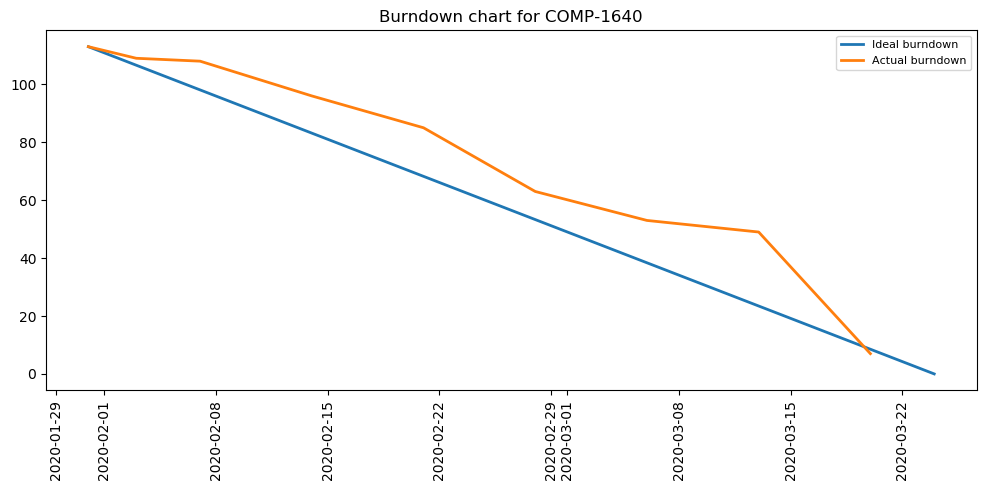

In [13]:
PLT_LINE_WIDTH = 2
fig = plt.figure(figsize=(10,5), dpi=100)
# plt.plot(planned_burndown.cards_remaining, label='Planned burndown', linewidth=PLT_LINE_WIDTH)
plt.plot(ideal_burndown.cards_remaining, label='Ideal burndown', linewidth=PLT_LINE_WIDTH)
plt.plot(actual_burndown.cards_remaining, label='Actual burndown', linewidth=PLT_LINE_WIDTH)


plt.title('Burndown chart for COMP-1640')
plt.legend(loc='upper right', fontsize=8)
plt.xticks(rotation=90) 
plt.tight_layout()
plt.savefig("burndown_chart_" + str(datetime.datetime.now().date()) + ".jpeg", transparent=False, portrait=False)